In [1]:
# import relevant libraries 
import pandas as pd 
import numpy as np 
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
fs="\t"

# define file repo path here
path="/Users/Hp/Desktop/2000_cohort_analysis/"
 


C:\Users\Hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# visualize the top feature importance in stratified 5-fold CVs
df = pd.read_csv(path + "feature_top_20_5_folds.csv",delimiter=',', quotechar='"')
df.head()

,Features,importance
0,age,0.004875
1,age,0.005359
2,age,0.005363
3,age,0.006960
4,age,0.003923


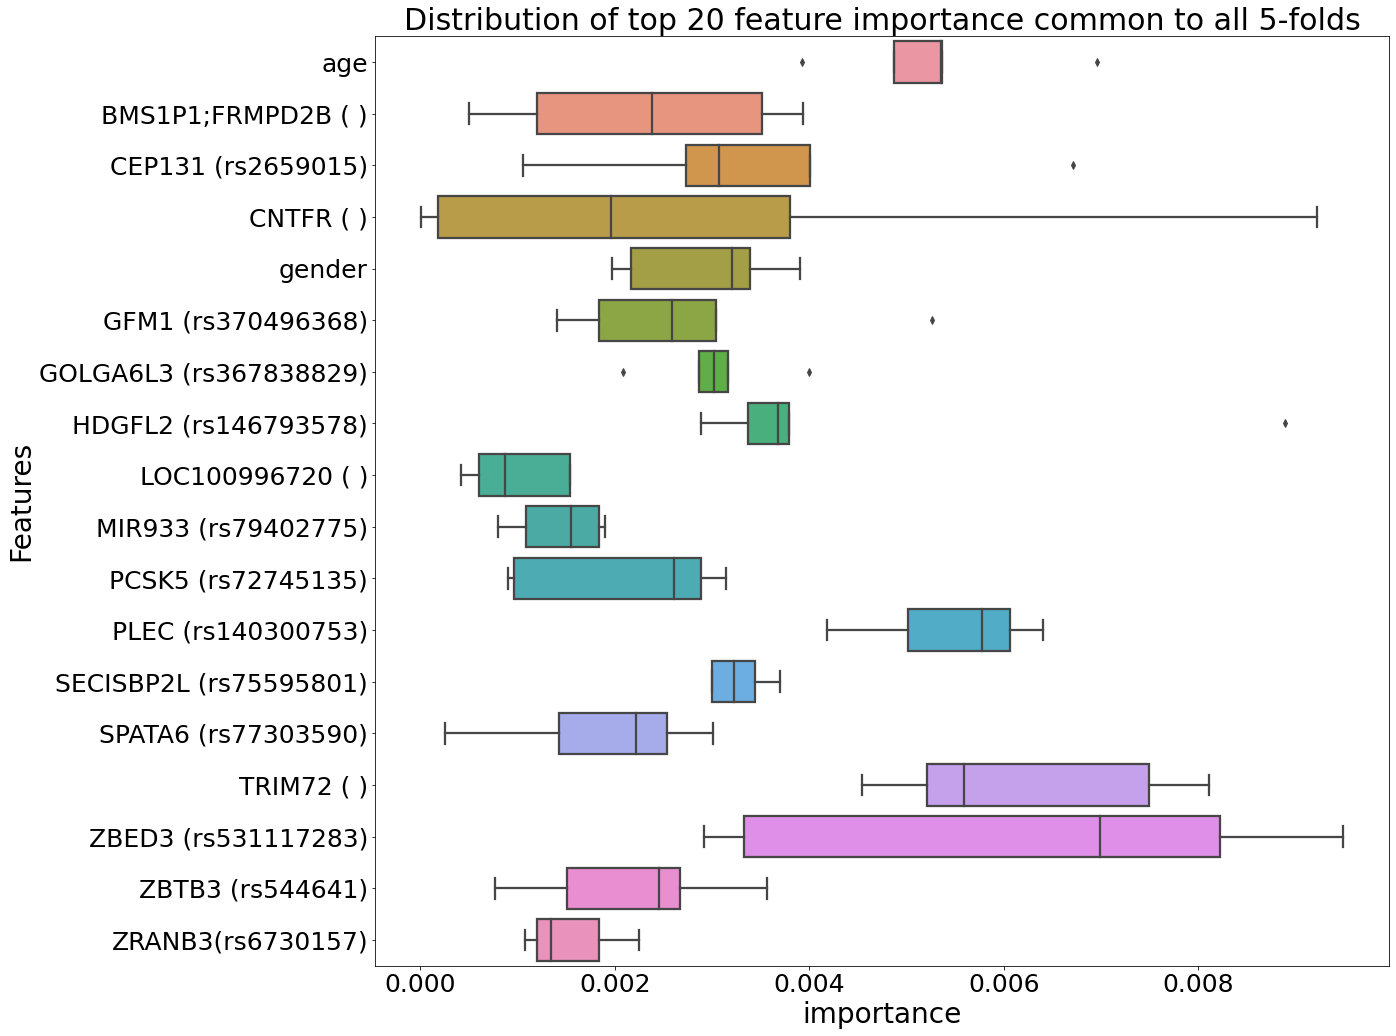

In [3]:
plt.rc('font', size=25) 
fig, ax = plt.subplots()
#pylab.rcParams['figure.figsize'] = (18.0, 14.0)
sns.set_context("talk", font_scale=1.5)
#sns.set(rc={"figure.figsize":(20, 20)})
fig.set_size_inches(20, 15, forward=True)
# Plot the orbital period with horizontal boxes
#sns.set_theme(style="ticks")

# horizontal boxplot in python
ax.set_xlabel('importance', fontsize=28)
ax.set_ylabel('Features', fontsize=28)
ax = sns.boxplot(y = "Features",
            x = "importance",
           data = df)
ax.set_title('Distribution of top 20 feature importance common to all 5-folds', fontsize=30)
plt.tight_layout()

# save figure 
plt.savefig(path+'Distribution of top 20 feature importance common to all 5-folds.pdf')

In [4]:
### Visualize ML performance metrices in stratified 5-foldCVs 

df = pd.read_csv(path + "fold_12345_performance_metrics_2000_cases.csv",delimiter=',', quotechar='"')
df.head()

,fold,metrics,algorithm,value
0,Fold 1,Accuracy,SVC,59.76
1,Fold 1,Accuracy,Logistic Reg,61.54
2,Fold 1,Accuracy,Random Forest,67.46
3,Fold 1,Accuracy,XGBoost,68.64
4,Fold 1,f1-score,SVC,71.90


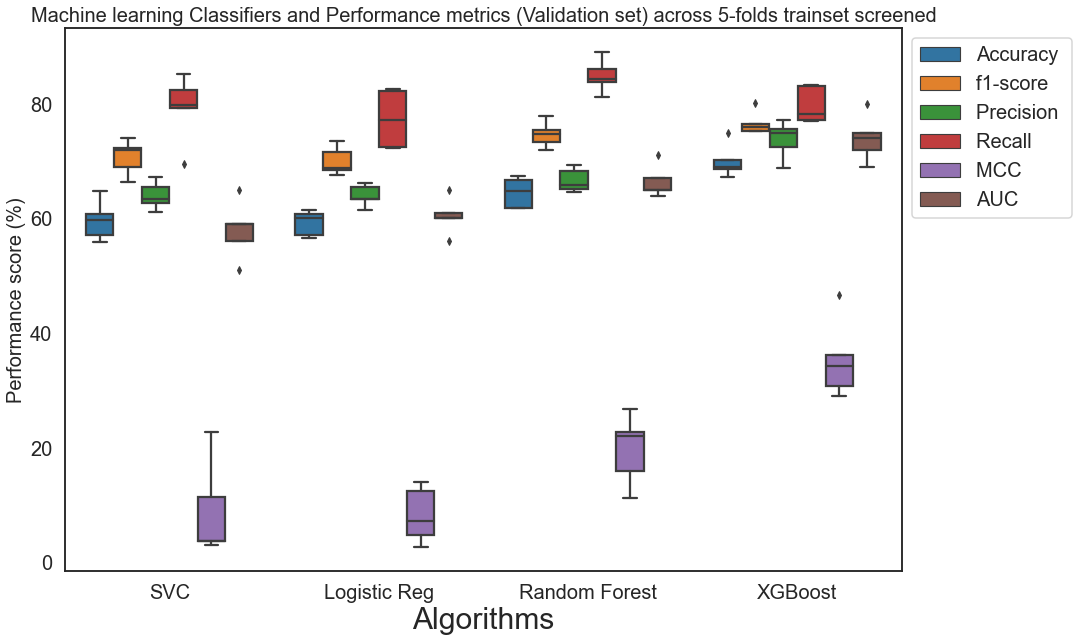

In [5]:
sns.set_style("white")
pylab.rcParams['figure.figsize'] = (15.0, 10.0)
ax = sns.boxplot(x="algorithm", y="value", hue="metrics", data=df)  # RUN PLOT  
ax.axes.set_title("Machine learning Classifiers and Performance metrics (Validation set) across 5-folds trainset screened",fontsize=20)
ax.set_xlabel("Algorithms",fontsize=30)
ax.set_ylabel("Performance score (%)",fontsize=20)
ax.tick_params(labelsize=20)
plt.legend(bbox_to_anchor=(1,1), loc="upper left", fontsize=20)
#plot.title('Machine learning Classifiers and Performance metrics (Validation set) across 5-folds trainset screened')
#plot.ylabel(("Performance score (%)"))
#plot.xlabel(("Algorithms"))
plt.savefig(path+'ML_performance_metrics_5_foldCV_corrections.pdf', bbox_inches="tight")
plt.show()